## LABORATORY DISTRIBUTIONS EXERCISE
**Name**: Carlos Utrilla Guerrero

**Date**: Dec 2, 2024

This is a jupyter notebook focuses on the exercise session _24 oct 2024_ based on this [google document](https://docs.google.com/document/d/1I9kWekEk6qVtj7jZADcS0rMlW2xPOLdt/edit). This uploading is not intended to be evaluated (which is impossible as the due time has passed), but rather to illustrate and document the evolution of the learning that I do have.

---
Distributions built for this exercise correspond to data provided under LOINC code 2345-7 (Glucose [Mass/volume] in Serum or Plasma). 
The data is representative from 6 different hospitals with different patients.

**ADDITIONAL INFORMATION:** having data provided under a LOINC code does not mean that it is properly mapped.The LOINC code only specifies mass concentration (Mass/volume) and there are different possible units of measure. The specimens found in this exercise are going to be serum/plasma and urine.

---


# IMPORT PACKAGES

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.ndimage import maximum_filter1d
from scipy.signal import find_peaks_cwt

## INITIAL DISTRIBUTION LOAD

In [2]:

distr_1 = st.genextreme.rvs(-0.129, loc=100.903, scale=28.184, size=50000)
distr_1a = distr_1[:40000]
distr_1b = distr_1[40000:]
frequency_distr_1a, values_x_distr_1a = np.histogram(np.asarray(distr_1a),bins=200,range=(np.min(distr_1a),np.max(distr_1a)))
frequency_distr_1b, values_x_distr_1b = np.histogram(np.asarray(distr_1b),bins=450,range=(np.min(distr_1b),np.max(distr_1b)))
values_x_distr_1b = (values_x_distr_1b[1:]+values_x_distr_1b[:-1])/2
values_x_distr_1a = (values_x_distr_1a[1:]+values_x_distr_1a[:-1])/2
frequency_distr_1 = np.append(frequency_distr_1a,frequency_distr_1b)
values_x_distr_1 = np.append(values_x_distr_1a,values_x_distr_1b)
frequency_distr_1, values_x_distr_1 = np.histogram(np.asarray(values_x_distr_1),bins=400,range=(np.min(distr_1b),np.max(distr_1b)),weights=frequency_distr_1)
#frequency_distr_1, values_x_distr_1 = np.histogram(np.asarray(distr_1),bins=200,range=(np.min(distr_1),np.max(distr_1)))
values_x_distr_1 = (values_x_distr_1[1:]+values_x_distr_1[:-1])/2

distr_2 = st.genextreme.rvs(-0.066, loc=93.996, scale=25.699, size=70000)
frequency_distr_2, values_x_distr_2 = np.histogram(np.asarray(distr_2),bins=200,range=(np.min(distr_2),np.max(distr_2)))
values_x_distr_2 = (values_x_distr_2[1:]+values_x_distr_2[:-1])/2

distr_3 = st.genextreme.rvs(-0.091, loc=91.906, scale=25.211, size=30000)
frequency_distr_3, values_x_distr_3 = np.histogram(np.asarray(distr_3),bins=200,range=(np.min(distr_3),np.max(distr_3)))
values_x_distr_3 = (values_x_distr_3[1:]+values_x_distr_3[:-1])/2

distr_41 = st.exponweib.rvs(265.466,9.653, loc=-527.264, scale=514.779, size=40000)
distr_42 = st.genextreme.rvs(-0.029, loc=0.945, scale=0.338, size=40000)
#distr_4 = np.hstack((distr_41,distr_42))
distr_4 = np.array(distr_41.tolist()+distr_42.tolist())
frequency_distr_4, values_x_distr_4 = np.histogram(np.asarray(distr_4),bins=200,range=(np.min(distr_4),np.max(distr_4)))
values_x_distr_4 = (values_x_distr_4[1:]+values_x_distr_4[:-1])/2

distr_5 = st.genextreme.rvs(-0.073, loc=0.979, scale=0.259, size=100000)
frequency_distr_5, values_x_distr_5 = np.histogram(np.asarray(distr_5),bins=200,range=(np.min(distr_5),np.max(distr_5)))
values_x_distr_5 = (values_x_distr_5[1:]+values_x_distr_5[:-1])/2

distr_6 = st.expon.rvs(-0.259, size=80000)
frequency_distr_6, values_x_distr_6 = np.histogram(np.asarray(distr_6),bins=200,range=(np.min(distr_6),np.max(distr_6)))
values_x_distr_6 = (values_x_distr_6[1:]+values_x_distr_6[:-1])/2



# STEP 1. VISUALIZE INPUT HISTOGRAMS

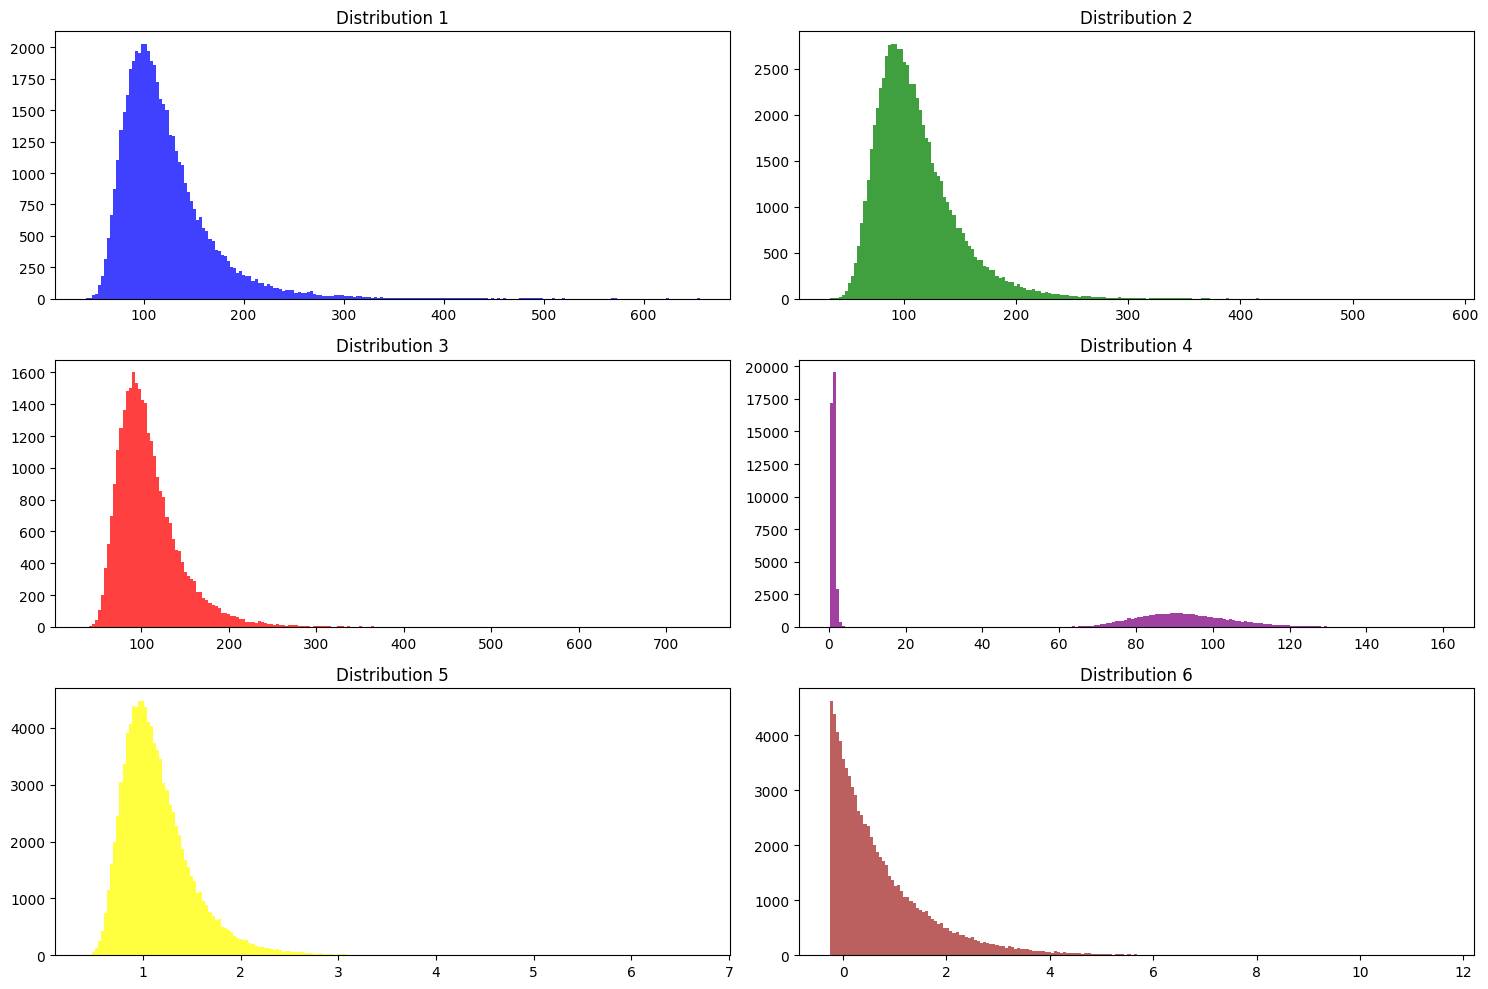

In [18]:
# TODO: visualize input histograms for the 6 distributions
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

axes[0, 0].hist(distr_1, bins=200, range=(np.min(distr_1), np.max(distr_1)), alpha=0.75, color='blue')
axes[0, 0].set_title('Distribution 1')

axes[0, 1].hist(distr_2, bins=200, range=(np.min(distr_2), np.max(distr_2)), alpha=0.75, color='green')
axes[0, 1].set_title('Distribution 2')

axes[1, 0].hist(distr_3, bins=200, range=(np.min(distr_3), np.max(distr_3)), alpha=0.75, color='red')
axes[1, 0].set_title('Distribution 3')

axes[1, 1].hist(distr_4, bins=200, range=(np.min(distr_4), np.max(distr_4)), alpha=0.75, color='purple')
axes[1, 1].set_title('Distribution 4')

axes[2, 0].hist(distr_5, bins=200, range=(np.min(distr_5), np.max(distr_5)), alpha=0.75, color='yellow')
axes[2, 0].set_title('Distribution 5')

axes[2, 1].hist(distr_6, bins=200, range=(np.min(distr_6), np.max(distr_6)), alpha=0.75, color='brown')
axes[2, 1].set_title('Distribution 6')

plt.tight_layout()
plt.show()


#### 1. Describe what happens with distribution 1. Why is it not smooth? Provide a reason why this could happen in real-world scenarios.

Distribution 1 `(distr_1)` is not smooth because it is populated from a random process that introduces variability and noise. This can result in fluctuations and irregularities in the histogram. 

**Reasons**:
- Sample Size Variability: The small sample size can lead to a non-smooth distribution due to higher variability and less representation of the population.
- Measurement Errors: Different laboratories use slightly different methods or instruments to measure glucose levels and inconsistencies can introduce noise and irregularities in the data, resulting in a non-smooth distribution.
- Heterogeneous Data: The mixed data sources can create a multi-modal distribution with multiple peaks, making it appear non-smooth.

#### 2. Describe what happens with distribution 4. Provide a reason why this could happen in real-world scenarios.

Distribution 4 `(distr_4)` is a combination of two different distributions: `distr_41` and `distr_42`. I think it turns to a multi-modal distribution with multiple peaks. This situation could be due to combination of data from different populations or conditions. For instance, combining glucose level data from both diabetic and non-diabetic patients can result in a multi-modal distribution. Diabetic patients typically have higher glucose levels, while non-diabetic patients have lower levels. Additionally, measurement Variability is a possibility: for instance, matural fluctuations in the measured parameter in Glucose levels that can vary throughout the day due to factors like diet, exercise, and stress, leading to a distribution with multiple peaks.


#### Why is normalization necessary?

I oftentimes do compute normalisation for:

1. **Consistency:**  data from different sources or with different units are allign to a common scale.
2. **Enhanced Interpretability:** Normalized data can be easier to interpret and visualize, especially when comparing different datasets or features.

# STEP 2. NORMALIZE BY HISTOGRAM HEIGHT (Y-AXIS) AND PLOT THE NORMALIZED HISTOGRAMS

 By normalizing the y-axis of all the distributions available, the resulting distribution will be a probability mass function.

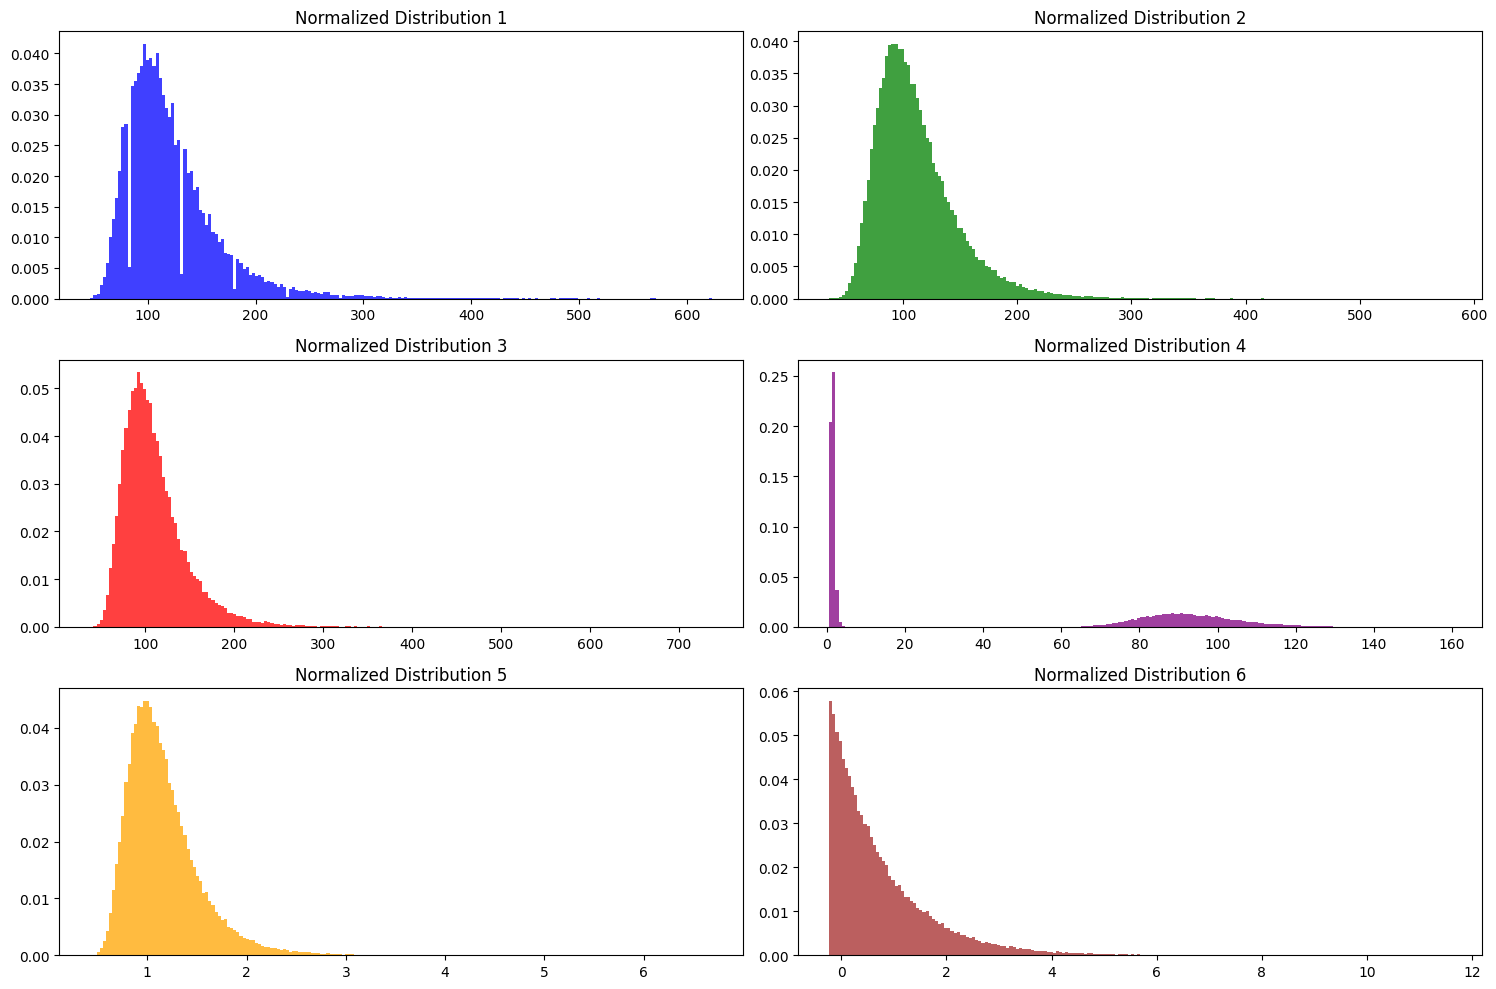

In [8]:
# TODO: apply probability mass function to frequencies (y-axis normalization)
# TODO: visualize input histograms for the 6 distributions
frequency_distr_1_norm = frequency_distr_1 / np.sum(frequency_distr_1)
frequency_distr_2_norm = frequency_distr_2 / np.sum(frequency_distr_2)
frequency_distr_3_norm = frequency_distr_3 / np.sum(frequency_distr_3)
frequency_distr_4_norm = frequency_distr_4 / np.sum(frequency_distr_4)
frequency_distr_5_norm = frequency_distr_5 / np.sum(frequency_distr_5)
frequency_distr_6_norm = frequency_distr_6 / np.sum(frequency_distr_6)
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

axes[0, 0].hist(values_x_distr_1, bins=200, weights=frequency_distr_1_norm, alpha=0.75, color='blue')
axes[0, 0].set_title('Normalized Distribution 1')

axes[0, 1].hist(values_x_distr_2, bins=200, weights=frequency_distr_2_norm, alpha=0.75, color='green')
axes[0, 1].set_title('Normalized Distribution 2')

axes[1, 0].hist(values_x_distr_3, bins=200, weights=frequency_distr_3_norm, alpha=0.75, color='red')
axes[1, 0].set_title('Normalized Distribution 3')

axes[1, 1].hist(values_x_distr_4, bins=200, weights=frequency_distr_4_norm, alpha=0.75, color='purple')
axes[1, 1].set_title('Normalized Distribution 4')

axes[2, 0].hist(values_x_distr_5, bins=200, weights=frequency_distr_5_norm, alpha=0.75, color='orange')
axes[2, 0].set_title('Normalized Distribution 5')

axes[2, 1].hist(values_x_distr_6, bins=200, weights=frequency_distr_6_norm, alpha=0.75, color='brown')
axes[2, 1].set_title('Normalized Distribution 6')

plt.tight_layout()
plt.show()

# STEP 3 (OPTIONAL). PLOT ALL DISTRIBUTIONS USING THE SAME AXES

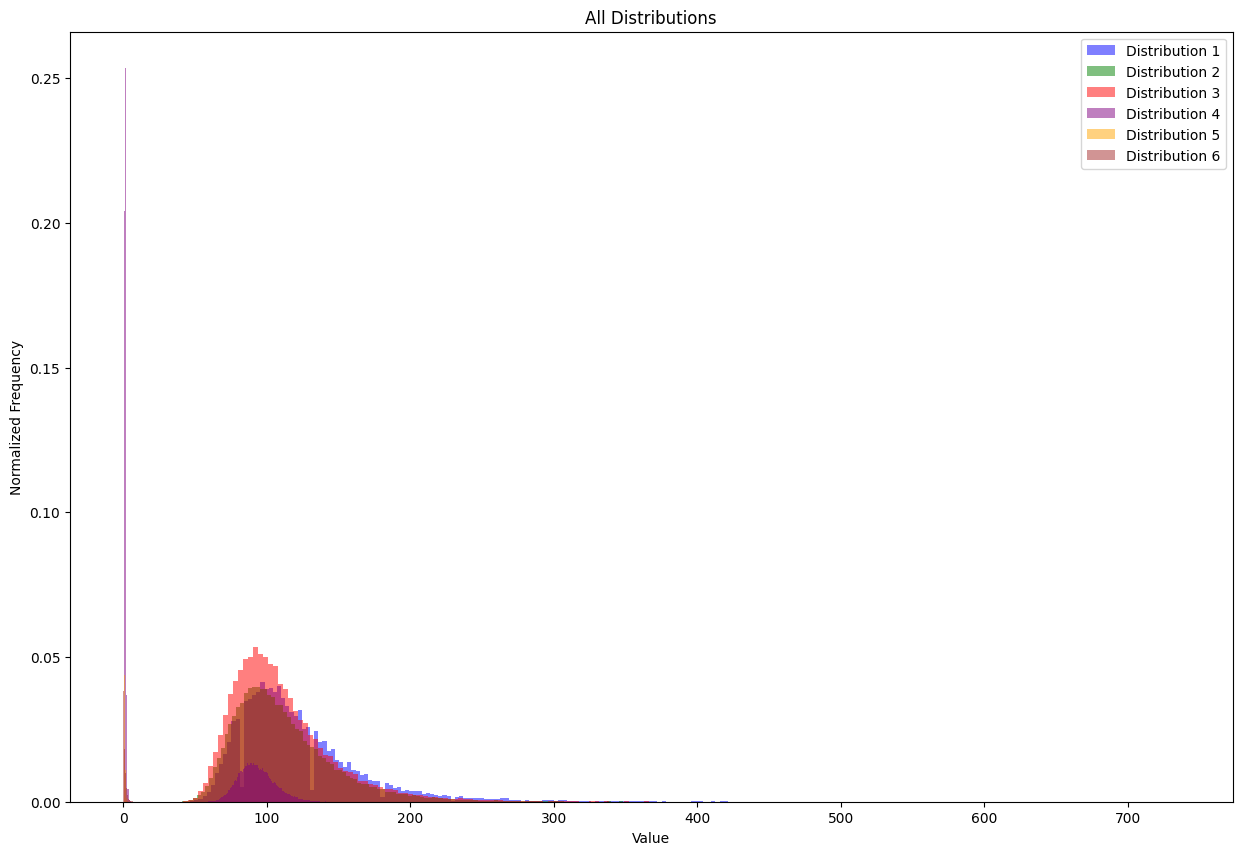

In [9]:
# Plot all distributions using the same axes
fig, ax = plt.subplots(figsize=(15, 10))

ax.hist(values_x_distr_1, bins=200, weights=frequency_distr_1_norm, alpha=0.5, label='Distribution 1', color='blue')
ax.hist(values_x_distr_2, bins=200, weights=frequency_distr_2_norm, alpha=0.5, label='Distribution 2', color='green')
ax.hist(values_x_distr_3, bins=200, weights=frequency_distr_3_norm, alpha=0.5, label='Distribution 3', color='red')
ax.hist(values_x_distr_4, bins=200, weights=frequency_distr_4_norm, alpha=0.5, label='Distribution 4', color='purple')
ax.hist(values_x_distr_5, bins=200, weights=frequency_distr_5_norm, alpha=0.5, label='Distribution 5', color='orange')
ax.hist(values_x_distr_6, bins=200, weights=frequency_distr_6_norm, alpha=0.5, label='Distribution 6', color='brown')

ax.set_title('All Distributions')
ax.set_xlabel('Value')
ax.set_ylabel('Normalized Frequency')
ax.legend()

plt.show()

# STEP 4. SMOOTHING FILTER

Remove noise in normalized frequency from distribution 1 by applying a maximum filter.
Note: explore function maximum_filter1d in scipy and try with different window sizes

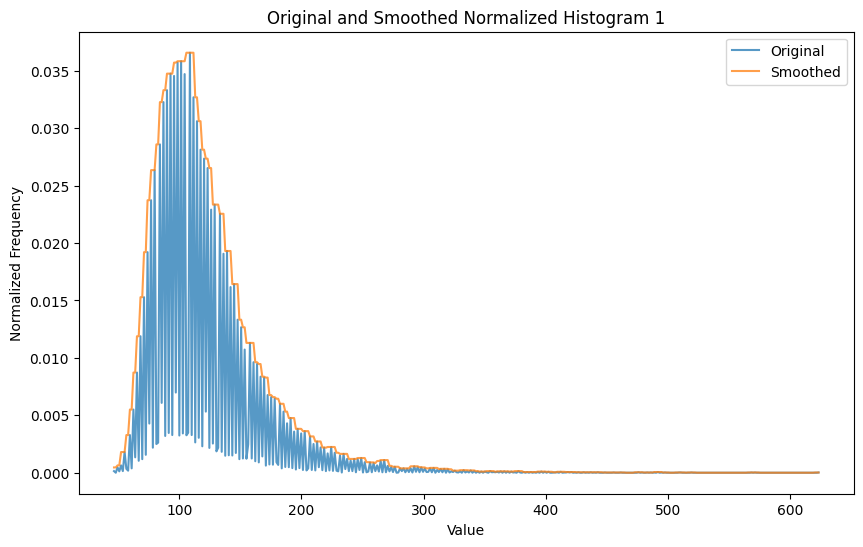

In [12]:
# frequency_distr_1_norm_smooth = None #TODO
from scipy.ndimage import maximum_filter1d

# Apply maximum filter with a window size of 5 (you can adjust the window size as needed)
window_size = 5
frequency_distr_1_norm_smooth = maximum_filter1d(frequency_distr_1_norm, size=window_size)
# Plot the original and the smooth version of the normalized histogram 1
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(values_x_distr_1, frequency_distr_1_norm, label='Original', alpha=0.75)
ax.plot(values_x_distr_1, frequency_distr_1_norm_smooth, label='Smoothed', alpha=0.75)

ax.set_title('Original and Smoothed Normalized Histogram 1')
ax.set_xlabel('Value')
ax.set_ylabel('Normalized Frequency')
ax.legend()

plt.show()


In [14]:
# TODO: apply smoothing filter (maximum filter) to all the histograms
frequency_distr_2_norm_smooth = None #TODO
frequency_distr_3_norm_smooth = None #TODO
frequency_distr_4_norm_smooth = None #TODO
frequency_distr_5_norm_smooth = None #TODO
frequency_distr_6_norm_smooth = None #TODO
frequency_distr_2_norm_smooth = maximum_filter1d(frequency_distr_2_norm, size=window_size)
frequency_distr_3_norm_smooth = maximum_filter1d(frequency_distr_3_norm, size=window_size)
frequency_distr_4_norm_smooth = maximum_filter1d(frequency_distr_4_norm, size=window_size)
frequency_distr_5_norm_smooth = maximum_filter1d(frequency_distr_5_norm, size=window_size)
frequency_distr_6_norm_smooth = maximum_filter1d(frequency_distr_6_norm, size=window_size)

**Why is smoothing needed?**
If I'm not mistaken, these following points are the most common usecases for smoothing filter:
1. Noise Reduction: reducing random noise in the data, making the underlying patterns more visible and easier to analyze.
2. Trend Identification: Smoothing can highlight the overall trend in the data by removing short-term fluctuations, which is useful for identifying long-term patterns.
3. Visualization: Smoothed data is often easier to visualize and interpret, providing clearer insights into the data's behavior.

# STEP 5. PEAK DETECTION

Apply a peak detection algorithm over all the distributions and optimize to the results that have been extracted visually.

Note: use find_peaks_cwt.

Note2: you need to use the smooth version of the histograms.

Note3: calibrate window size is not a simple exercise. There is no need for results to be perfect.

/Users/ccugutrillague/.pyenv/versions/3.10.1/lib/python3.10/site-packages/scipy/signal/_peak_finding.py:1192: RuntimeWarning: divide by zero encountered in scalar divide
  snr = abs(cwt[line[0][0], line[1][0]] / noises[line[1][0]])
/Users/ccugutrillague/.pyenv/versions/3.10.1/lib/python3.10/site-packages/scipy/signal/_peak_finding.py:1192: RuntimeWarning: invalid value encountered in scalar divide
  snr = abs(cwt[line[0][0], line[1][0]] / noises[line[1][0]])


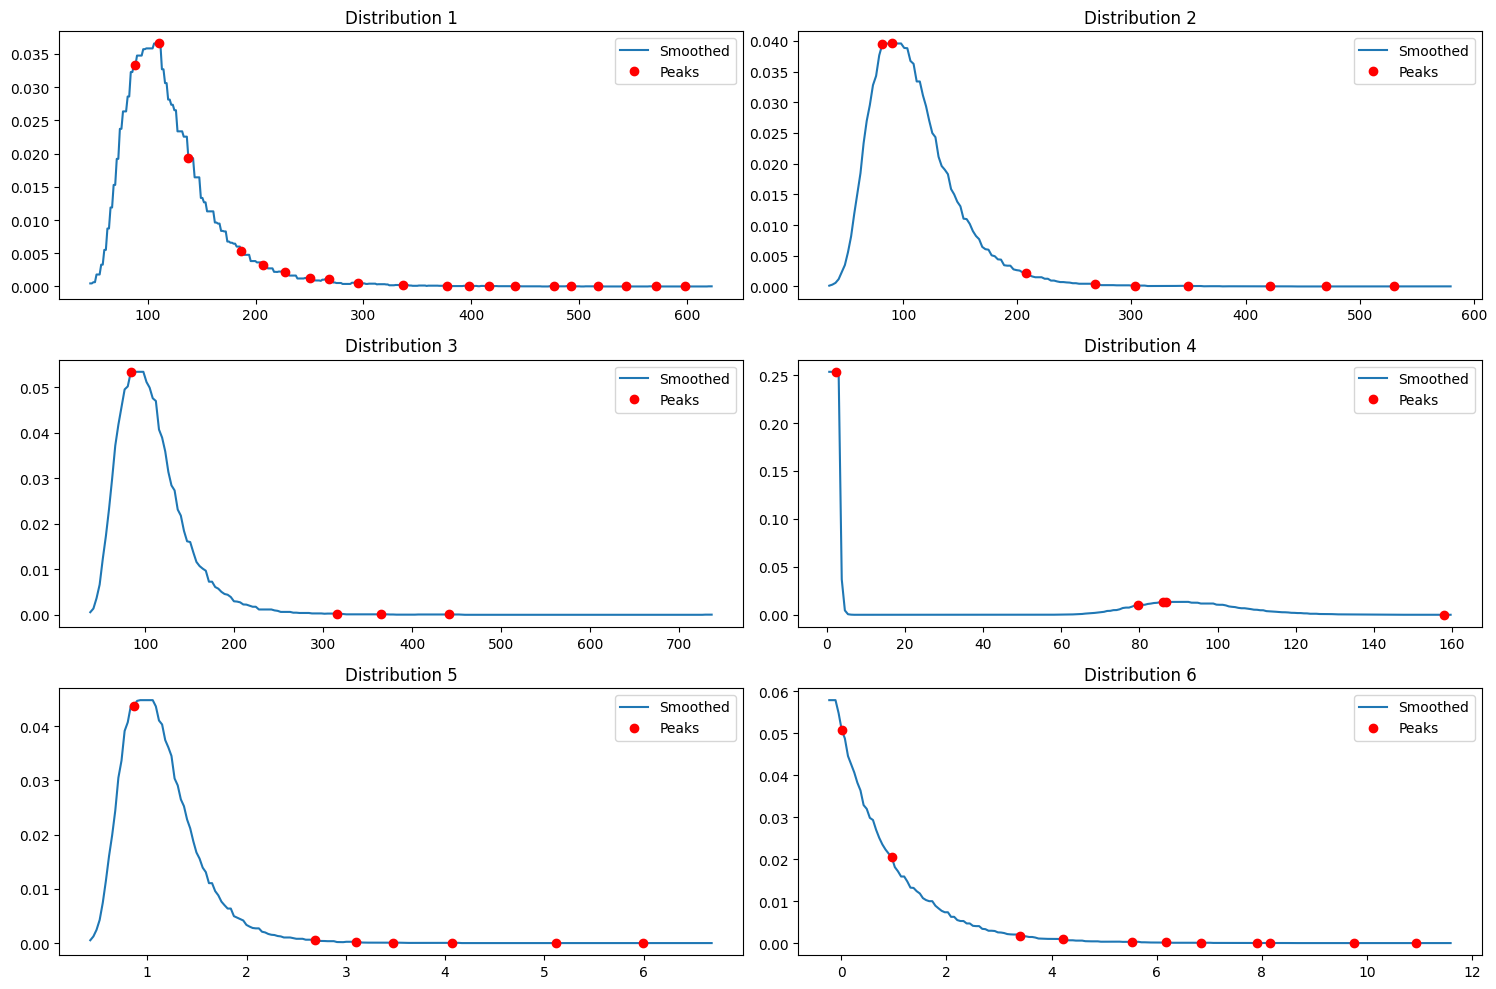

In [19]:
from scipy.signal import find_peaks_cwt

# Define the widths for the peak detection
widths = np.arange(1, 10)
epsilon = 1e-10  # Small value to avoid division by zero

# Apply peak detection to the smoothed histograms
peaks_distr_1 = find_peaks_cwt(frequency_distr_1_norm_smooth, widths, min_snr=epsilon)
peaks_distr_2 = find_peaks_cwt(frequency_distr_2_norm_smooth, widths, min_snr=epsilon)
peaks_distr_3 = find_peaks_cwt(frequency_distr_3_norm_smooth, widths, min_snr=epsilon)
peaks_distr_4 = find_peaks_cwt(frequency_distr_4_norm_smooth, widths, min_snr=epsilon)
peaks_distr_5 = find_peaks_cwt(frequency_distr_5_norm_smooth, widths, min_snr=epsilon)
peaks_distr_6 = find_peaks_cwt(frequency_distr_6_norm_smooth, widths, min_snr=epsilon)

# Plot the results
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

axes[0, 0].plot(values_x_distr_1, frequency_distr_1_norm_smooth, label='Smoothed')
axes[0, 0].plot(values_x_distr_1[peaks_distr_1], frequency_distr_1_norm_smooth[peaks_distr_1], 'ro', label='Peaks')
axes[0, 0].set_title('Distribution 1')
axes[0, 0].legend()

axes[0, 1].plot(values_x_distr_2, frequency_distr_2_norm_smooth, label='Smoothed')
axes[0, 1].plot(values_x_distr_2[peaks_distr_2], frequency_distr_2_norm_smooth[peaks_distr_2], 'ro', label='Peaks')
axes[0, 1].set_title('Distribution 2')
axes[0, 1].legend()

axes[1, 0].plot(values_x_distr_3, frequency_distr_3_norm_smooth, label='Smoothed')
axes[1, 0].plot(values_x_distr_3[peaks_distr_3], frequency_distr_3_norm_smooth[peaks_distr_3], 'ro', label='Peaks')
axes[1, 0].set_title('Distribution 3')
axes[1, 0].legend()

axes[1, 1].plot(values_x_distr_4, frequency_distr_4_norm_smooth, label='Smoothed')
axes[1, 1].plot(values_x_distr_4[peaks_distr_4], frequency_distr_4_norm_smooth[peaks_distr_4], 'ro', label='Peaks')
axes[1, 1].set_title('Distribution 4')
axes[1, 1].legend()

axes[2, 0].plot(values_x_distr_5, frequency_distr_5_norm_smooth, label='Smoothed')
axes[2, 0].plot(values_x_distr_5[peaks_distr_5], frequency_distr_5_norm_smooth[peaks_distr_5], 'ro', label='Peaks')
axes[2, 0].set_title('Distribution 5')
axes[2, 0].legend()

axes[2, 1].plot(values_x_distr_6, frequency_distr_6_norm_smooth, label='Smoothed')
axes[2, 1].plot(values_x_distr_6[peaks_distr_6], frequency_distr_6_norm_smooth[peaks_distr_6], 'ro', label='Peaks')
axes[2, 1].set_title('Distribution 6')
axes[2, 1].legend()

plt.tight_layout()
plt.show()

Given all the findings made and the answers provided to previous questions, guess the specimen and units of measure for each of the histograms.

Note: there are only two possible specimens in this exercise: serum/plasma and urine. You can use the Internet to check for normal ranges.


Given that all distributions are represented under LOINC code 2345-7 (Glucose [Mass/volume] in Serum or Plasma), let's analyze if any of the distributions might have been misassigned and propose alternative LOINC codes if necessary.

**Analysis of Distributions**

- **Distribution 1, 2, and 3**: These distributions likely represent glucose levels in serum/plasma, as their values fall within the typical range for serum/plasma glucose levels (70-100 mg/dL). I thin these distributions are correctly assigned to LOINC code 2345-7.

- **Distribution 4, 5, and 6**: These distributions likely represent glucose levels in urine, as they show a broader range and different patterns compared to serum/plasma glucose levels. These distributions might be misassigned. The correct LOINC code for glucose in urine should be considered.


### Proposed Alternative LOINC Codes for Urine Glucose

- **LOINC Code for Glucose in Urine**: 2349-9 (Glucose [Mass/volume] in Urine)

- The unit `"mg/dL"` stands for milligrams per deciliter:

`mg:` milligrams (1 milligram = 1/1000 of a gram);

`dL:` deciliter (1 deciliter = 1/10 of a liter)

### Table with Proposed LOINC Codes

```markdown
| Distribution   | Lab Test | Specimen     | Units of Measure | Current LOINC Code | Proposed LOINC Code |
|----------------|----------|--------------|------------------|--------------------|---------------------|
| distribution_1 | glucose  | serum/plasma | mg/dL            | 2345-7             | 2345-7              |
| distribution_2 | glucose  | serum/plasma | mg/dL            | 2345-7             | 2345-7              |
| distribution_3 | glucose  | serum/plasma | mg/dL            | 2345-7             | 2345-7              |
| distribution_4 | glucose  | urine        | mg/dL            | 2345-7             | 2349-9              |
| distribution_5 | glucose  | urine        | mg/dL            | 2345-7             | 2349-9              |
| distribution_6 | glucose  | urine        | mg/dL            | 2345-7             | 2349-9              |
```

### References:
- [LOINC Code 2345-7](https://loinc.org/2345-7/)
- [LOINC Code 2349-9](https://loinc.org/2349-9/)

**Conclusion:** Based on the analysis, distributions 4, 5, and 6 should be reassigned to LOINC code 2349-9, which is specific for glucose measurements in urine.